# **Feature importance**

## Import Data

In [51]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib 
from pandas_profiling import ProfileReport
import pathlib
import xgboost as xgb
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [52]:
df = pd.read_csv('/content/total_merged_train.csv')
df = df.drop(columns=['customerid'] + ['systemloanid'])
y = df['good_bad_flag']
df.head()

,loannumber,loanamount,termdays,interest,loan_interval,interest_interval,good_bad_flag,avg_loanamount,avg_paym_span_hrs,avg_active_span_days,avg_interest,max_loannumber,bank_name_clients,age,age_interval,state
0,0-4,10000.0,30,3000.0,10000,3000,0,10000.000000,0.000000,33.000000,3000.000000,1.0,Multinational Banks,36.0,36-40,Lagos
1,0-4,10000.0,30,3000.0,10000,3000,1,10000.000000,13.000000,3.000000,3000.000000,1.0,GT Bank,41.0,41-61,Lagos
2,+4,20000.0,30,3000.0,mas de 10000,3000,1,15000.000000,15.166667,23.333333,3133.333333,6.0,Multinational Banks,34.0,26-35,Other
3,0-4,20000.0,30,4500.0,mas de 10000,mas de 3000,1,10000.000000,13.666667,25.333333,3000.000000,3.0,GT Bank,47.0,41-61,Other
4,+4,20000.0,30,4500.0,mas de 10000,mas de 3000,1,12727.272727,11.636364,14.000000,1559.090909,11.0,Multinational Banks,27.0,26-35,Other


**Dummies**

In [53]:
dummy_int = pd.get_dummies(df[['interest_interval']])
dummy_bank_name = pd.get_dummies(df[['bank_name_clients']], drop_first=True)
dummy_td = pd.get_dummies(df[['termdays']], drop_first=True)
dummy_age = pd.get_dummies(df[['age_interval']])
dummy_state = pd.get_dummies(df[['state']], drop_first=True)
dummy_loan = pd.get_dummies(df[['loan_interval']], drop_first=True)
dummy_loannum = pd.get_dummies(df[['loannumber']], drop_first=True)

df = pd.concat([df, dummy_int, dummy_bank_name, dummy_td, dummy_age, dummy_state, dummy_loan, dummy_loannum], axis=1)
df = df.drop(['interest_interval','bank_name_clients', 'termdays', 'age_interval','state','loan_interval','loannumber'], 1)

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


,loanamount,interest,good_bad_flag,avg_loanamount,avg_paym_span_hrs,avg_active_span_days,avg_interest,max_loannumber,age,interest_interval_3000,interest_interval_mas de 3000,interest_interval_menos de 3000,bank_name_clients_Multinational Banks,termdays_Other,age_interval_26-35,age_interval_36-40,age_interval_41-61,state_Other,loan_interval_mas de 10000,loannumber_0-4
0,10000.0,3000.0,0,10000.000000,0.000000,33.000000,3000.000000,1.0,36.0,1,0,0,1,0,0,1,0,0,0,1
1,10000.0,3000.0,1,10000.000000,13.000000,3.000000,3000.000000,1.0,41.0,1,0,0,0,0,0,0,1,0,0,1
2,20000.0,3000.0,1,15000.000000,15.166667,23.333333,3133.333333,6.0,34.0,1,0,0,1,0,1,0,0,1,1,0
3,20000.0,4500.0,1,10000.000000,13.666667,25.333333,3000.000000,3.0,47.0,0,1,0,0,0,0,0,1,1,1,1
4,20000.0,4500.0,1,12727.272727,11.636364,14.000000,1559.090909,11.0,27.0,0,1,0,1,0,1,0,0,1,1,0


## Selección de variables

In [54]:
sc = StandardScaler()
X = sc.fit_transform(df.drop(['good_bad_flag'],axis=1))
print(np.mean(X))
print(np.var(X))

-6.511926840439071e-17
1.0


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(np.mean(X_train))
print(np.var(X_train))

-0.0011835008870996488
1.0025138167618557


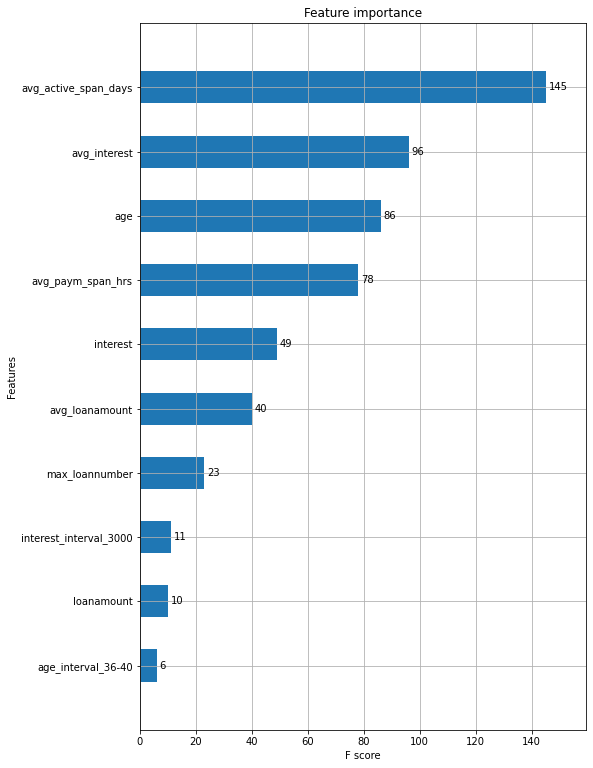

In [56]:
x, y = df.drop(['good_bad_flag'],axis=1), df['good_bad_flag']
model = xgb.XGBClassifier()
model.fit(x, y)
fig, ax = plt.subplots(1, 1, figsize=(8, 13))
xgb.plot_importance(model, height=0.5, ax=ax, max_num_features=10)
plt.show()

In [57]:
imp_feats = ["avg_active_span_days","avg_interest","age","avg_paym_span_hrs","interest","avg_loanamount",
              "max_loannumber","interest_interval_3000","loanamount","age_interval_36-40"]
top10 = df[imp_feats]
top10.head()

,avg_active_span_days,avg_interest,age,avg_paym_span_hrs,interest,avg_loanamount,max_loannumber,interest_interval_3000,loanamount,age_interval_36-40
0,33.000000,3000.000000,36.0,0.000000,3000.0,10000.000000,1.0,1,10000.0,1
1,3.000000,3000.000000,41.0,13.000000,3000.0,10000.000000,1.0,1,10000.0,0
2,23.333333,3133.333333,34.0,15.166667,3000.0,15000.000000,6.0,1,20000.0,0
3,25.333333,3000.000000,47.0,13.666667,4500.0,10000.000000,3.0,0,20000.0,0
4,14.000000,1559.090909,27.0,11.636364,4500.0,12727.272727,11.0,0,20000.0,0


In [58]:
top10.to_csv('top10_variables_train.csv', index=False)

### Repetimos en el test

In [59]:
df2 = pd.read_csv("/content/total_merged_test.csv")

In [ ]:
dummy_int = pd.get_dummies(df2[['interest_interval']])
dummy_bank_name = pd.get_dummies(df2[['bank_name_clients']], drop_first=True)
dummy_td = pd.get_dummies(df2[['termdays']], drop_first=True)
dummy_age = pd.get_dummies(df2[['age_interval']])
dummy_state = pd.get_dummies(df2[['state']], drop_first=True)
dummy_loan = pd.get_dummies(df2[['loan_interval']], drop_first=True)
dummy_loannum = pd.get_dummies(df2[['loannumber']], drop_first=True)

df2 = pd.concat([df2, dummy_int, dummy_bank_name, dummy_td, dummy_age, dummy_state, dummy_loan, dummy_loannum], axis=1)
df2 = df2.drop(['interest_interval','bank_name_clients', 'termdays', 'age_interval','state','loan_interval','loannumber', 'systemloanid', 'good_bad_flag'], axis=1)

df2.head()

In [61]:
top10_test = df2[imp_feats]
top10_test.head()

,avg_active_span_days,avg_interest,age,avg_paym_span_hrs,interest,avg_loanamount,max_loannumber,interest_interval_3000,loanamount,age_interval_36-40
0,19.0,2700.0,39.0,12.8,4500.0,14000.0,5.0,0,20000.0,1
1,29.0,3000.0,42.0,13.0,3000.0,10000.0,2.0,1,10000.0,0
2,57.0,3000.0,45.0,7.0,3000.0,10000.0,1.0,1,10000.0,0
3,14.0,1500.0,40.0,18.0,3000.0,10000.0,1.0,1,10000.0,1
4,19.6,2700.0,37.0,9.0,4500.0,14000.0,5.0,0,20000.0,1


In [62]:
top10_test.to_csv('top10_variables_test.csv', index=False)

# **Método de los coeficientes**

In [87]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': df.drop(['good_bad_flag'],axis=1).columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
importances

,Attribute,Importance
5,avg_interest,0.621915
10,interest_interval_menos de 3000,0.390570
0,loanamount,0.298126
7,age,0.276373
14,age_interval_36-40,0.079269
11,bank_name_clients_Multinational Banks,0.048619
17,loan_interval_mas de 10000,0.011297
15,age_interval_41-61,0.000990
1,interest,-0.040646
13,age_interval_26-35,-0.078082


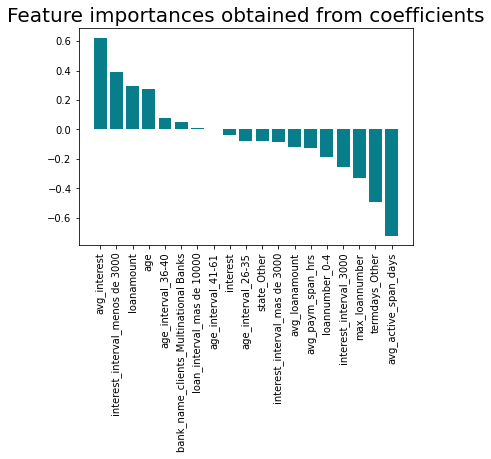

In [64]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#Escogemos las variables cuyo coeficiente sea mayor que 0.1 en valor absoluto
coeff_feats = ["avg_active_span_days","avg_interest","termdays_Other","interest_interval_menos de 3000","max_loannumber",
               "loanamount", "age","interest_interval_3000", "loannumber_0-4","avg_paym_span_hrs","avg_loanamount"]

topfeats = df[coeff_feats]
topfeats.head()

In [90]:
topfeats.to_csv('topfeats_coeff_train.csv', index=False)

## Repetimos en el test

In [ ]:
topfeats = df2[coeff_feats]
topfeats.head()

In [92]:
topfeats.to_csv('topfeats_coeff_test.csv', index=False)